In [75]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis #2.SORU ICIN KULLANILAN KUTUPHANELER

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score #3.SORU ICIN KULLANILAN KUTUPHANELER

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix 
from sklearn.tree import plot_tree   #4.SORU ICIN KULLANILAN KUTUPHANELER

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix #5.SORU ICIN KULLANILAN KUTUPHANELER



In [16]:
df = pd.read_csv("veri-seti.txt", delimiter="\t")

In [87]:
clean_df = df.drop(df.columns[9:],axis=1)

clean_df

,Nprg,PlGlu,DiaBlo,Thic,SerIns,BMI,DiaPed,Age,ClaVar
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [27]:
# ---------- 2. SORU ------------------------------

In [20]:
# Özellikler ve etiketler ayrılması
X = clean_df.drop('ClaVar', axis=1)
y = clean_df['ClaVar']

In [21]:
# Veri setini standartlaştır
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [22]:
# PCA uygulama
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)


In [24]:
# LDA uygulama
lda = LinearDiscriminantAnalysis(n_components=1)
X_lda = lda.fit_transform(X_scaled, y)

In [25]:
# En yüksek iki öz değeri ve öz vektörlerin raporlanması (PCA)
print("PCA Öz Değerler:")
print(pca.explained_variance_ratio_)
print("\nPCA Öz Vektörler:")
print(pca.components_)

PCA Öz Değerler:
[0.26179749 0.21640127]

PCA Öz Vektörler:
[[ 0.1284321   0.39308257  0.36000261  0.43982428  0.43502617  0.45194134
   0.27061144  0.19802707]
 [ 0.59378583  0.17402908  0.18389207 -0.33196534 -0.25078106 -0.1009598
  -0.122069    0.62058853]]


In [26]:
# En yüksek iki öz değeri ve öz vektörlerin raporlanması (LDA)
print("\nLDA Öz Değerler:")
print(lda.explained_variance_ratio_)
print("\nLDA Öz Vektörler:")
print(lda.scalings_)



LDA Öz Değerler:
[1.]

LDA Öz Vektörler:
[[ 0.31607552]
 [ 0.86226241]
 [-0.20560649]
 [ 0.01122858]
 [-0.09477594]
 [ 0.4756584 ]
 [ 0.22222693]
 [ 0.14043251]]


In [28]:
#--------------------- 3.SORU ---------------------

In [58]:
# Veri setini özellikler ve etiketler olarak ayırma
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [59]:
# Çoklu Doğrusal Regresyon analizi uygulama
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)


LinearRegression()

In [60]:
# Katsayıları raporlama
print("Çoklu Doğrusal Regresyon Katsayıları:")
for i, feature in enumerate(X.columns):
    print(f"{feature}: {linear_reg.coef_[i]}")


Çoklu Doğrusal Regresyon Katsayıları:
Nprg: 0.030286058204009522
PlGlu: 0.18345470727479965
DiaBlo: -0.03309901685635043
Thic: -0.004036604067121423
SerIns: -0.014568774383350977
BMI: 0.12743121461128293
DiaPed: 0.02413868247144775
Age: 0.07362404793342203


In [61]:
# Test kümesi için tahmin yapma
linear_reg_predictions = linear_reg.predict(X_test)


In [62]:
# Çoklu Doğrusal Regresyon performans metriklerini hesaplama
linear_reg_mse = mean_squared_error(y_test, linear_reg_predictions)
print("\nÇoklu Doğrusal Regresyon MSE:", linear_reg_mse)


Çoklu Doğrusal Regresyon MSE: 0.17603335005142035


In [63]:
# Multinominal Lojistik Regresyon analizi uygulama
logistic_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
logistic_reg.fit(X_train, y_train)


LogisticRegression(max_iter=1000, multi_class='multinomial')

In [64]:
# Katsayıları raporlama
print("\nMultinominal Lojistik Regresyon Katsayıları:")
for i, feature in enumerate(X.columns):
    print(f"{feature}: {logistic_reg.coef_[0][i]}")



Multinominal Lojistik Regresyon Katsayıları:
Nprg: 0.09741378833911854
PlGlu: 0.5667512291001285
DiaBlo: -0.1020857062344933
Thic: -0.012239166860721655
SerIns: -0.05470839193745335
BMI: 0.42416131617228264
DiaPed: 0.0697007724696836
Age: 0.20963225511191824


In [65]:
# Test kümesi için tahmin yapma
logistic_reg_predictions = logistic_reg.predict(X_test)


In [66]:
# Multinominal Lojistik Regresyon performans metriklerini hesaplama
logistic_reg_accuracy = accuracy_score(y_test, logistic_reg_predictions)
print("\nMultinominal Lojistik Regresyon Accuracy:", logistic_reg_accuracy)


Multinominal Lojistik Regresyon Accuracy: 0.7359307359307359


In [67]:
#--------------- 4.SORU ------------------------------

In [68]:
# Karar Ağacı sınıflandırma algoritması uygulama
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [69]:
# Test verisi için tahmin yapma
y_pred = decision_tree.predict(X_test)


In [70]:
# Performans metriklerini hesaplama
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.6926406926406926


In [71]:
# Sınıflandırma raporu
print("\nSınıflandırma Raporu:")
print(classification_report(y_test, y_pred))


Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.79      0.72      0.75       151
           1       0.55      0.64      0.59        80

    accuracy                           0.69       231
   macro avg       0.67      0.68      0.67       231
weighted avg       0.71      0.69      0.70       231



In [72]:
# Karmaşıklık matrisi
print("\nKarmaşıklık Matrisi:")
print(confusion_matrix(y_test, y_pred))


Karmaşıklık Matrisi:
[[109  42]
 [ 29  51]]


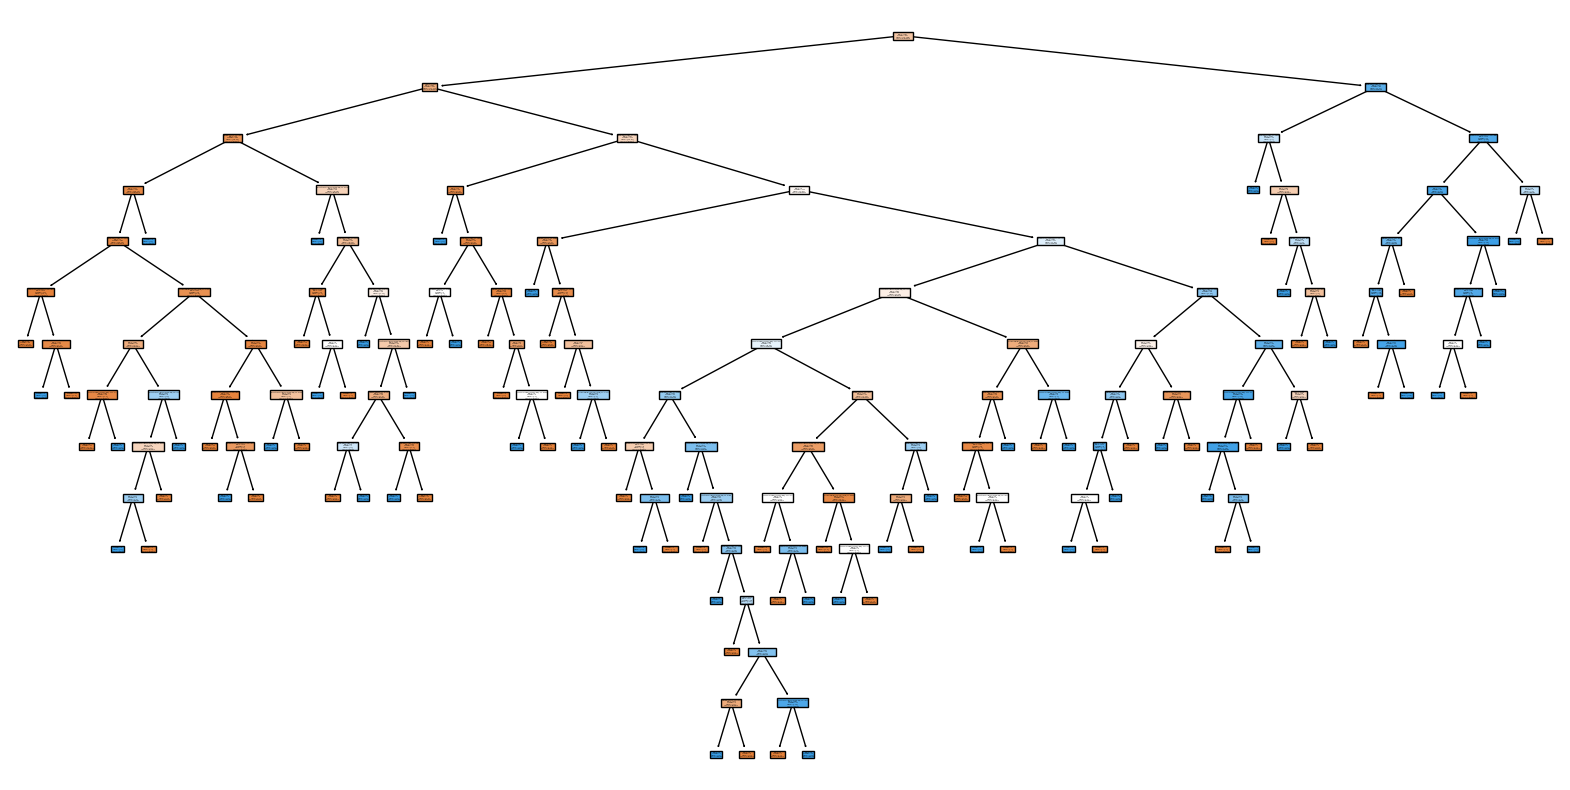

In [73]:
X_columns = ['Pregnant Number', 'Plasma Glucose', 'Diolastic Blood Pressure(mm Hg)',
       'Triceps Skinfold Thickness(mm)', '2-Hours Serum Insulin(mu U/ml)',
       'Body Mass Index', 'Diabetes Pedigree Function', 'Age']
plt.figure(figsize=(20, 10))
plot_tree(decision_tree, filled=True, feature_names=X_columns, class_names=["No Diabetes", "Diabetes"])
plt.show()

In [76]:
#-------------------------- 5.SORU --------------------------------

In [77]:
# Naive Bayes sınıflandırıcısını uygulama
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)

GaussianNB()

In [78]:
# Test verisi için tahmin yapma
y_pred = naive_bayes.predict(X_test)


In [79]:
# Performans metriklerini hesaplama
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.7445887445887446


In [80]:
# Sınıflandırma raporu
print("\nSınıflandırma Raporu:")
print(classification_report(y_test, y_pred))


Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.82      0.79      0.80       151
           1       0.62      0.66      0.64        80

    accuracy                           0.74       231
   macro avg       0.72      0.73      0.72       231
weighted avg       0.75      0.74      0.75       231



In [81]:
# Karmaşıklık matrisi
print("\nKarmaşıklık Matrisi:")
print(confusion_matrix(y_test, y_pred))


Karmaşıklık Matrisi:
[[119  32]
 [ 27  53]]


In [88]:
#-------------------------3.SORU PCA ------------------------------------------


In [92]:
X_pca_train = pca.fit_transform(X_train)
X_pca_test = pca.fit_transform(X_test)
linear_reg = LinearRegression()
linear_reg.fit(X_pca_train, y_train)

threshold = 0.5

linear_reg_predictions = linear_reg.predict(X_pca_test)

binary_predictions = [1 if prediction >= threshold else 0 for prediction in linear_reg_predictions]


In [93]:
conf_matrix = confusion_matrix(y_test, binary_predictions)
print("Confusion Matrix:")
print(conf_matrix)

print("\nClassification Report:")
print(classification_report(y_test, binary_predictions))


Confusion Matrix:
[[101  50]
 [ 60  20]]

Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.67      0.65       151
           1       0.29      0.25      0.27        80

    accuracy                           0.52       231
   macro avg       0.46      0.46      0.46       231
weighted avg       0.51      0.52      0.52       231



In [94]:
multinomial_log_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs')
multinomial_log_reg.fit(X_pca_train, y_train)

LogisticRegression(multi_class='multinomial')

In [95]:
multinomial_log_reg_predictions = multinomial_log_reg.predict(X_pca_test)

conf_matrix_multinomial = confusion_matrix(y_test, multinomial_log_reg_predictions)
print("\nConfusion Matrix (Multinominal Lojistik Regresyon):")
print(conf_matrix_multinomial)

print("\nClassification Report (Multinominal Lojistik Regresyon):")
print(classification_report(y_test, multinomial_log_reg_predictions))


Confusion Matrix (Multinominal Lojistik Regresyon):
[[101  50]
 [ 60  20]]

Classification Report (Multinominal Lojistik Regresyon):
              precision    recall  f1-score   support

           0       0.63      0.67      0.65       151
           1       0.29      0.25      0.27        80

    accuracy                           0.52       231
   macro avg       0.46      0.46      0.46       231
weighted avg       0.51      0.52      0.52       231



In [96]:
#-------------- 4.SORU PCA ---------------

In [98]:
decision_tree = DecisionTreeClassifier(criterion="entropy")
decision_tree.fit(X_pca_train, y_train)

y_pred = decision_tree.predict(X_pca_test)

In [99]:
# Model performansını değerlendirme
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[96 55]
 [63 17]]

Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.64      0.62       151
           1       0.24      0.21      0.22        80

    accuracy                           0.49       231
   macro avg       0.42      0.42      0.42       231
weighted avg       0.48      0.49      0.48       231



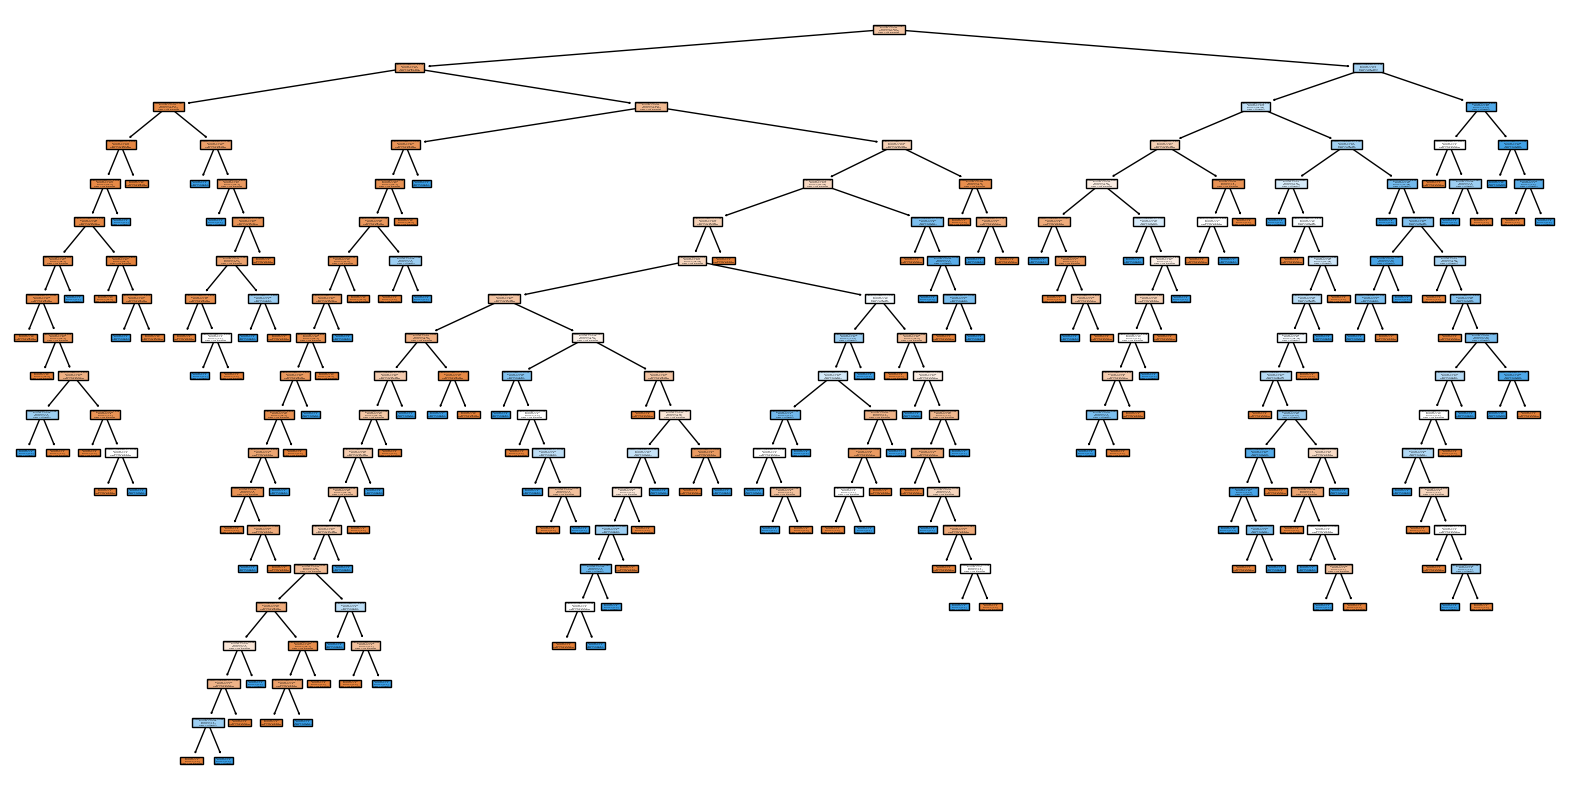

Accuracy: 0.48917748917748916


In [103]:
X_columns = ['Pregnant Number', 'Plasma Glucose', 'Diolastic Blood Pressure(mm Hg)',
       'Triceps Skinfold Thickness(mm)', '2-Hours Serum Insulin(mu U/ml)',
       'Body Mass Index', 'Diabetes Pedigree Function', 'Age']
plt.figure(figsize=(20, 10))
plot_tree(decision_tree, filled=True, feature_names=X_columns, class_names=["No Diabetes", "Diabetes"])
plt.show()
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

In [104]:
#------------------- 5.Soru PCA ------------------------

In [105]:
naive_bayes = GaussianNB()
naive_bayes.fit(X_pca_train, y_train)

GaussianNB()

In [106]:
y_pred = naive_bayes.predict(X_pca_test)

test_accuracy = accuracy_score(y_test, y_pred)
print("Test Verisi Doğruluk Oranı:", test_accuracy)

print("\nTest Verisi Confusion Matrix ve Sınıflandırma Raporu:")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


conf_matrix = confusion_matrix(y_test, y_pred)



Test Verisi Doğruluk Oranı: 0.5194805194805194

Test Verisi Confusion Matrix ve Sınıflandırma Raporu:
[[102  49]
 [ 62  18]]
              precision    recall  f1-score   support

           0       0.62      0.68      0.65       151
           1       0.27      0.23      0.24        80

    accuracy                           0.52       231
   macro avg       0.45      0.45      0.45       231
weighted avg       0.50      0.52      0.51       231

